# Predicting heart disease using machine learning
This notebook looks down into using various python-based machinelearning and data science libraries in an attempt to build a machine learning model capable of predicting whather or not someone has heart disease or not based on their medical attributes

We're going to take the following apploach :

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem definition
 In a statement:
 >Given cilnical parametrs of a patient ,can we predict whather he has hearth disease or not
## 2.Data
The original data came from  cleaveland data from the uci machine learning repository

## 3.Evaluation
>if we can reach 95% accuracy at predicting whether or not a patient has heart desease or not during the proof of concept,we'll pursue the project

## 4.Features
**Create a dictionary** 

* age
* 
sex
* 
chest pain type (4 values
* )
resting blood pressu
* re
serum cholestoral in mg
* /dl
fasting blood sugar > 120 m
* g/dl
resting electrocardiographic results (values 0
* ,1,2)
maximum heart rate ac
* hieved
exercise induced
*  angina
oldpeak = ST depression induced by exercise relative
*  to rest
the slope of the peak exercise S
* T segment
number of major vessels (0-3) colored by 
* flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defectable defect


# Preparing tools
we're going to use pandas,matplotlib and numpy fr data analysis or manipulation

In [1]:
!pip install scikit-learn

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plots to appear iinside our notbook
%matplotlib inline
# models in scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve





C:\Users\user\AppData\Local\Temp\ipykernel_14328\2334902689.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Load data**

In [5]:
df =pd.read_csv(r"C:\Users\user\Documents\[TutsNode.com] - Complete Machine Learning & Data Science Bootcamp 2021\11. Milestone Project 1 Supervised Learning (Classification)\7.1 heart-disease.csv")
df.shape

(303, 14)

In [6]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


# Data exploration (exploratory data analysis or EDA)
 
The goal here is to know more about the data and become  a subject matter about the data you're warking with.

1. What questions are you trying to solve?
2. what kind of data do we have and how do we treat  the different types
3. what's missing in the data and how do you deaal with it
4. what are the outliers and why should you care about them
5. How can you add,change or remove features to get more out of your data




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [10]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

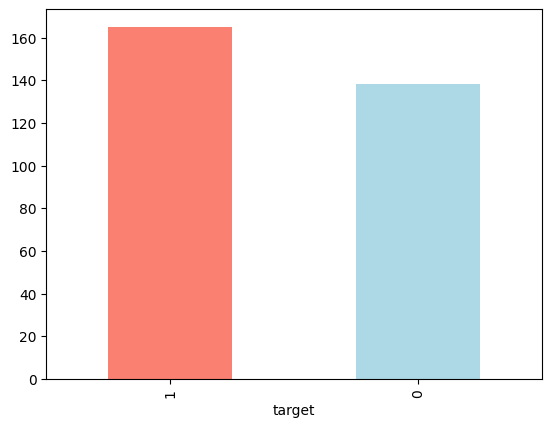

In [11]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency to sex


In [13]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
# compare  target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


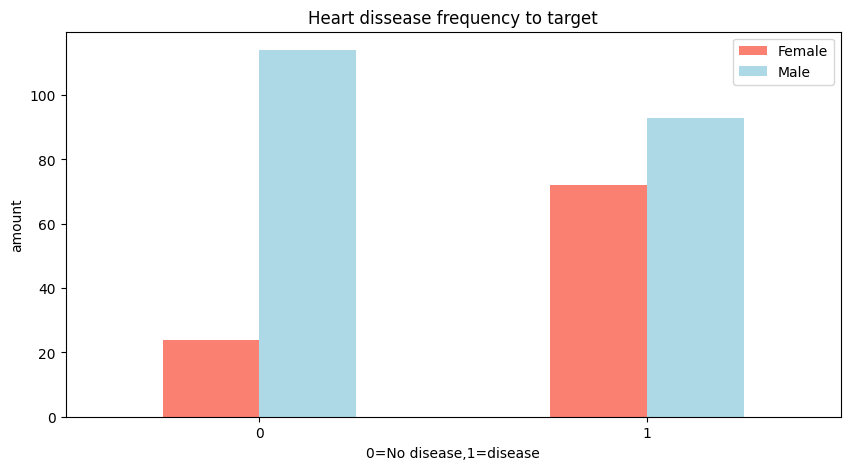

In [15]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,5),color=['salmon','lightblue'])
plt.title('Heart dissease frequency to target')
plt.xlabel('0=No disease,1=disease')
plt.ylabel('amount')
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Heart disease frequency to cp

In [16]:
df['chol'].value_counts()

chol
204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64

due to mamany values as  ashown by leth let's plot a scatter plot

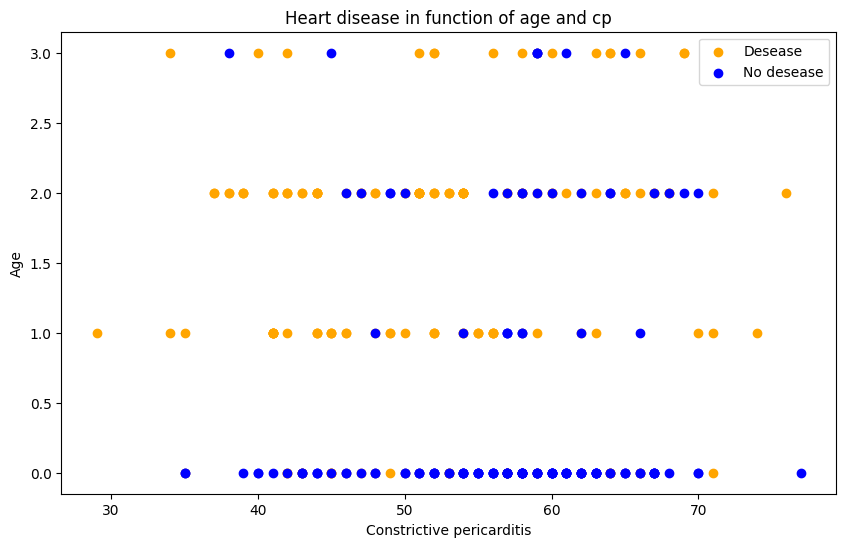

In [17]:
# Add a figure
plt.figure(figsize=(10,6))
# plot a scatter for positive values 
plt.scatter(df.age[df.target==1],
            df.cp[df.target==1],
            c="orange")
# plot for negative value
plt.scatter(df.age[df.target==0],
            df.cp[df.target==0],
            c="blue")
# add important information
plt.title("Heart disease in function of age and cp")
plt.xlabel("Constrictive pericarditis")
plt.ylabel("Age")
plt.legend(["Desease","No desease"])
           
                   
              


In [18]:
pd.crosstab(df.target,df.chol).plot(kind='bar',figsize=(10,5))
plt.xlabels('
                                    

SyntaxError: unterminated string literal (detected at line 2) (2723509369.py, line 2)

###  Age vs.MAX heart rate for heart desease

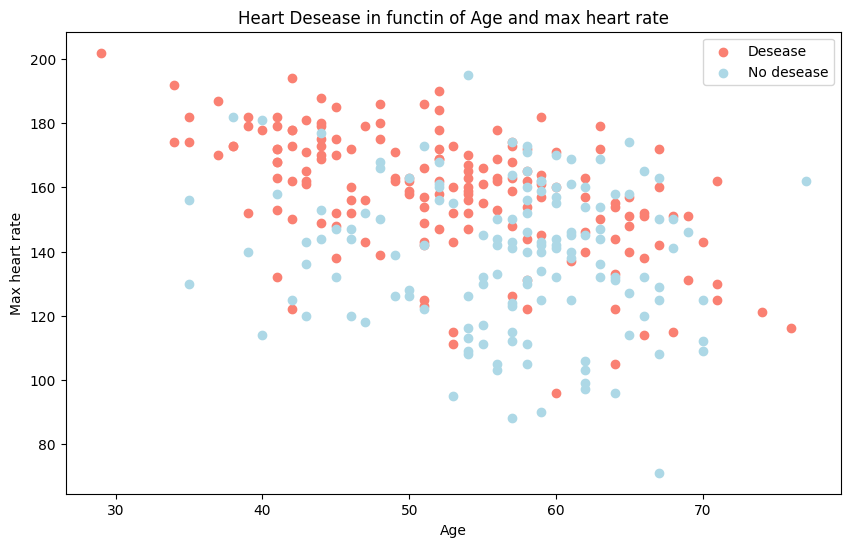

In [19]:
# create a figure
plt.figure(figsize=(10,6))
# scatter with positive examples
plt.scatter(df.age[df.target==1],
             df.thalach[df.target==1],
             c="salmon")
# scatter with a negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
# add sme helful information
plt.title("Heart Desease in functin of Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate");
plt.legend(["Desease","No desease"]);            

In [20]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### Age vs cholestral for heart desease

In [21]:
df.age.value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [22]:
df.chol.value_counts()

chol
204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64

In [23]:
# create a figure
plt.figure(figsize=(10,6))
# plot for positive values
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1],
            c="green")
# plot for negative values 
plt.scatter(df.age[df.target==0],
            df.chol[df.target==0],
            c="red")
# Add additional informsation
plt.title("Heart Desease in fuction of age and cholestral")
plt,xlabel("Age")
plt.ylabel("Chorestral")
plt.legend(["Disease","no desease"
            
            

           

SyntaxError: incomplete input (2347309052.py, line 19)

<Axes: ylabel='Frequency'>

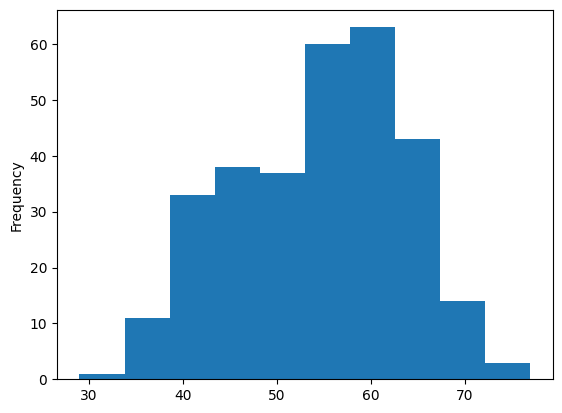

In [24]:
# Check for the distribution of age with a histogram
df.age.plot.hist()

In [25]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


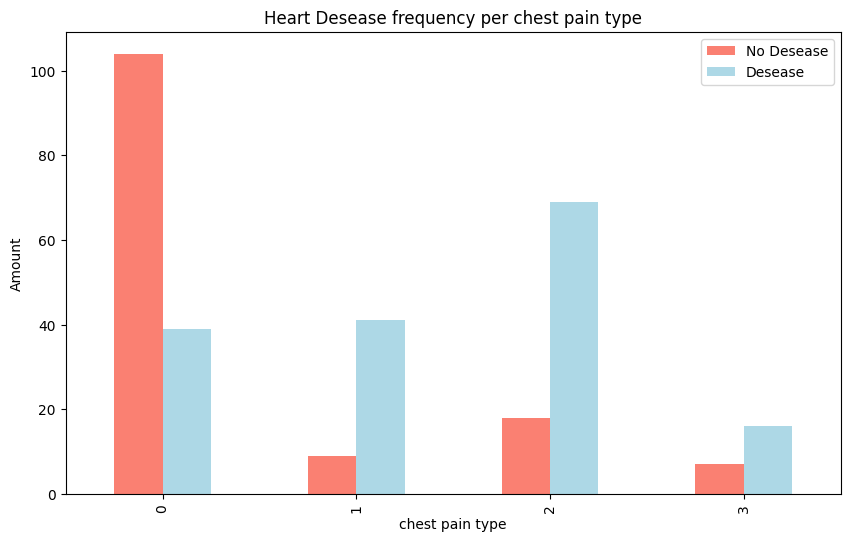

In [26]:
# make closs tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
# Add some communication
plt.title("Heart Desease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No Desease","Desease"]);

### Coreelation

In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


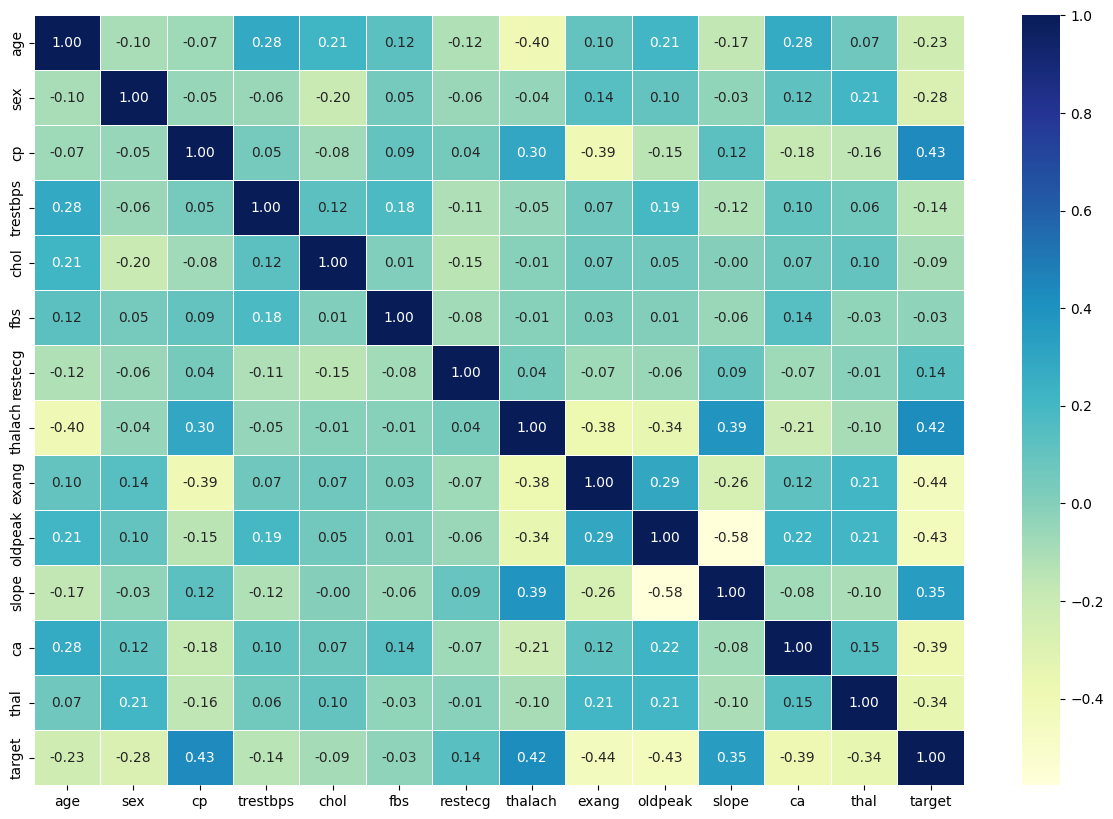

In [28]:
# make our correation more pletier using seabrns heat map
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")


# 5.Modelling 

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
# split data into x and y
x=df.drop("target",axis=1)
y=df["target"]

In [31]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [33]:
# split our data into train and test set
np.random.seed(42)
# split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [34]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [35]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [36]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [37]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

now we've got our data split into training and testing set,it's time to build a machine learning model

we'll train it(find the patterns ) on training set 

we'll test it (use the patterns)  on the testing set

we"regoing to try 3 different machine learing models:
1. Logisitic regression
2. Random Forest classifier
3. KNeighborsClassifier

In [38]:
# put our model in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest ":RandomForestClassifier()}
# Create a function to fit and score methods
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
   Fits and evaluates given machine learning models.
   models: a dict of different scikit-learn machine learning models
   x_train:training data (No labels)
   x_test:testing data (no labels)
   y_train:training labels
   y_test:testing labels
    """
    # Set a random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores={}
    # loop through the models
    for name,model in models.items():
        # fit the model into data
        model.fit(x_train,y_train)
        # Evaluate the model and append it's score to model_score
        model_scores[name]=model.score(x_test,y_test)
     
    return model_scores



In [39]:
model_scores=fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\user\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest ': 0.8360655737704918}

### MODEL COMPARISON

<Axes: >

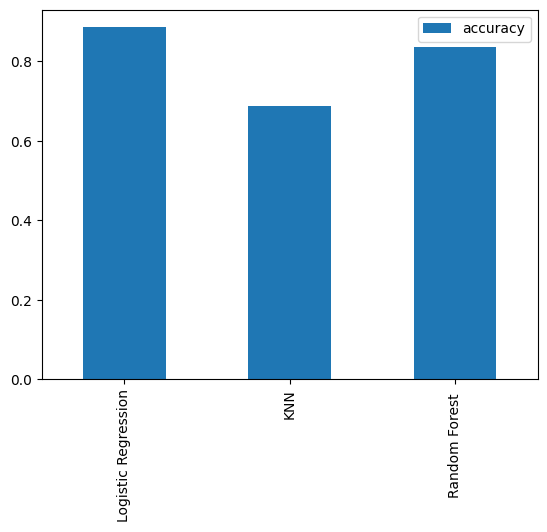

In [40]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()


                           

NOW we've got our baseline models..... and we know our models prediction aren't what we should always our bext steps off. what should we do?

let's look at the following:
* hyperparameter tuning
* feature importance
* Confusion matrix
* cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve
### Hyperparameter tuning  

In [41]:
# let's Tune KNN
train_scores=[]

test_scores=[]
# create a list of different values for n_neighbors
neighbors= range(1,21)

# set up KNN Instance
Knn=KNeighborsClassifier()
# loop through n_neighbors
for i in neighbors:
    Knn.set_params(n_neighbors=i)
    # fit the alogarithim
    Knn.fit(x_train,y_train)
    # update the trainig score list
    train_scores.append(Knn.score(x_train,y_train))
    # update test score list
    test_scores.append(Knn.score(x_test,y_test))




In [42]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [43]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max Knn score on the test data:75.41%


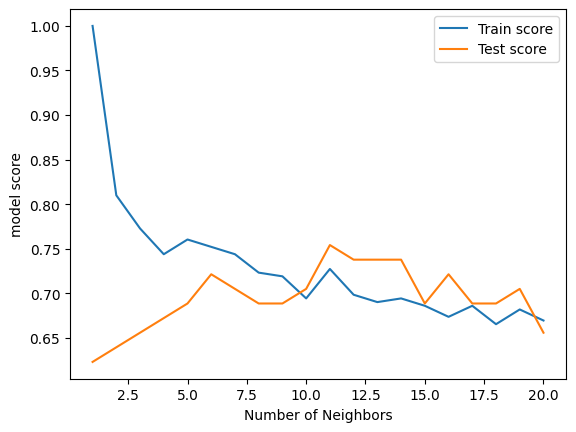

In [44]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of Neighbors")
plt.ylabel("model score")
plt.legend()

print(f"Max Knn score on the test data:{max(test_scores)*100:.2f}%")

In [45]:
# create a yper paameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
# create a hyperparametet grid for random forest classifier
rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}



now we've got hyperparameter grid set up for each of our models ,let's tune them using randomized search cv

In [46]:
# Tune Logistic regression
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

now"ve tuned logistic regression lets ttune for RandomForestClassifier()

In [49]:
# Set up a random seed
np.random.seed(42)
# set up randomized search  for RandomForestClassifier()
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# fit hyper parameter search model for random forest classifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [51]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## hyperparameter tunig with GridsearchCV
Since our logistic regression model probides the best scores so far,we'll try and improve them again using GridsearchCV...


In [52]:
# Different Hyperparameters for gridsearchCV
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
# set up Grid Hyperparameter search for logistic regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
# fit the hyperparameter gRISEARCH TO THE MODEL
gs_log_reg.fit(x_train,y_train)
                       

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [54]:
# evaluate grid search logistic regression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [55]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest ': 0.8360655737704918}

## Evaluate our tuned machine learning classifier,beyond accuracy

* Roc curve and Auc curve
* confusion matrix
* Classification Report
* Precision
* Recall
* F1-score
...and it would be great if Cross-validation was used where possible
To make comparison and evaluate our trained model,first we need to make predictions 

In [56]:
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

A roc curve is a plot of true positive rate against the false positive rate

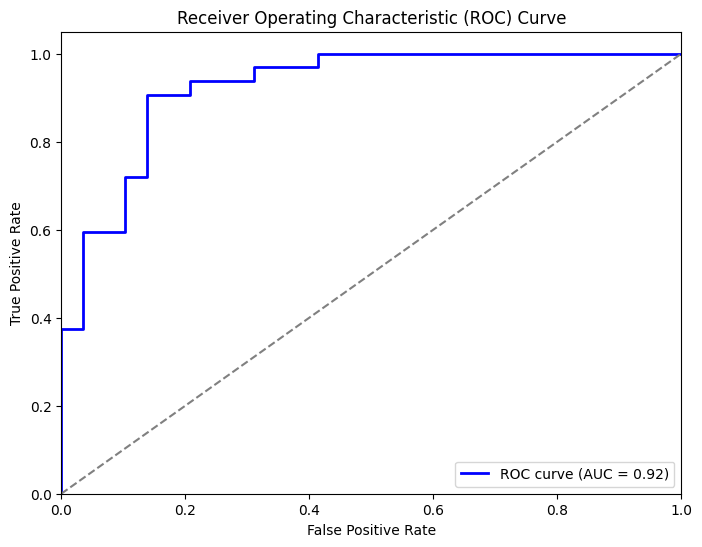

In [58]:
# plot roc curve and calculate Auc metric
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming gs_log_reg is your trained logistic regression model
# Assuming x_test and y_test are your test data
# Assuming gs_log_reg.predict_proba(x_test)[:, 1] gives the probability of class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gs_log_reg.predict_proba(x_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [59]:
# confusion  matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


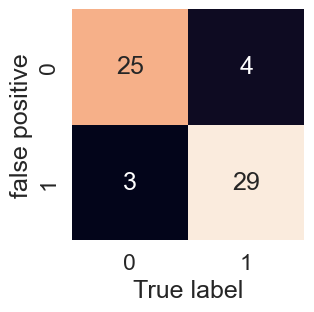

In [60]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
   ''' 
   plot anie looking confusion martrix using seaborn's heatmsp
   '''
   fig,ax=plt.subplots(figsize=(3,3))
   ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
   plt.xlabel("True label")  
   plt.ylabel("false positive")
   
plot_conf_mat(y_test,y_preds)    

   
    

    
    










                  

Nw we've got an ROc curve and auc metrix let's get a classification report as well as cross validated precision ,recall and f1 score

In [61]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculatee evaluation metrics using cross valdation

we're going to calculate precision ,recall and f1 score of our model using cross validation  and to do so we'll be using 'cross_val_score()'


In [62]:
# check best Hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [63]:
# create anew classifier with best params
clf=LogisticRegression(C=0.23357214690901212,
                       solver='liblinear')
                       

In [64]:
# cross-validated accuracy
cv_acc=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [65]:
np.mean(cv_acc)

0.8479781420765027

In [66]:
# cross-validated precision
cv_precision=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [67]:
# cross_validated  recall
cv_recall = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [68]:
# cross validated f1
cv_f1 = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': 'cross validated classification metrics'}>

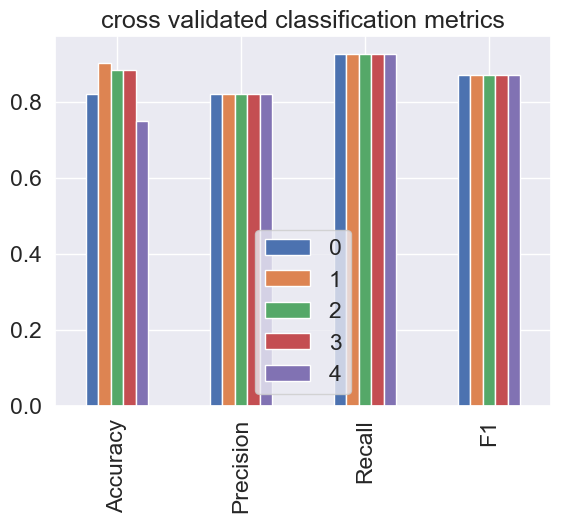

In [70]:
# Visualize cross_validated metrics
cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "F1":cv_f1}
                        )
                        
cv_metrics.T.plot.bar(title="cross validated classification metrics")


### Feature Importance
Feature importance is a way of asking which features contributed most to the outcomes of the model and how did they contribute?


In [73]:
# Fit an instance of Logistic regression
gs_log_reg.best_params_
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [74]:
# check COEF
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [75]:
# match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

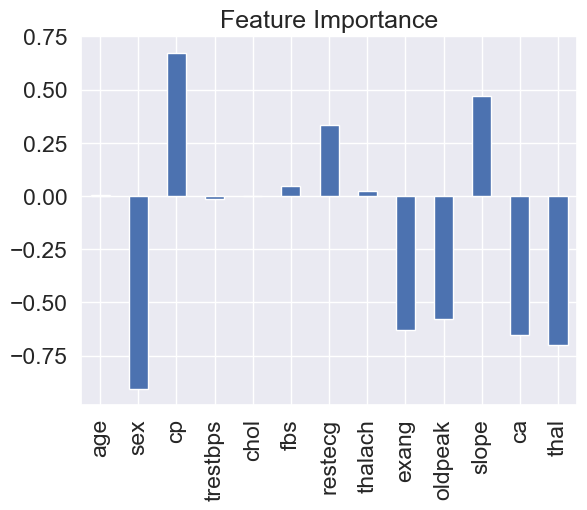

In [77]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [78]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


## 6. Experimentation
if you haven't hit your evaluation metric yet...ask yourself...

* could you collect more data?
* could yu try a better model?likeCatbost or xgboost?
* could you improve the current models?(beyond what we've done so far)
* if your model is  good enough(have you hit yur evaluation metric)
how would you export it and share it with others